# Virtual Cell Model  - MD - Analysis

In [1]:
###Working directory###

try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd -q $workdir

In [2]:
### Import packages ###
import os
import mdtraj as md
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
from numpy import genfromtxt
display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 100%; }
    div#maintoolbar-container { width: 100%; }
</style>
"""))
plt.rcParams.update({'font.size':22,'legend.frameon':True,'figure.figsize':[12,8],'xtick.major.size':7,'ytick.major.size':7,'legend.labelspacing':1})

# Functions

In [3]:
# Calculate the density profile of ions

Nav = 6.022e23          # 1/mol
to_mM = 1e24/Nav *1000 # convert 1/nm^3 --> mmol/l

def densityProfile(traj, I,  bins):
    ''' calculates the ion profile from trajectory '''
    d = []
    sel = traj.top.select('name '+(I)) # Ions index
    traj.atom_slice(sel, inplace=True)  # Create a new trajectory from a subset of atoms
    origin = np.array(traj.unitcell_lengths[0]/2) # Middle of box
    
    for i in traj.xyz:
        d.append(np.linalg.norm(i-origin, axis=1)) # Ions distances from the middle of the box
    d = np.array(d).flatten()  # Return a copy of the array collapsed into one dimension
    P, r = np.histogram(d, bins=bins) # Histogram of the distances
    r=r[:-1]
    dr = r[1]-r[0]
    rho = P/(4*np.pi*r**2*dr) * to_mM / len(d) * len(sel)
    return r, rho

# Solution conditions

In [4]:
####################################################
Ions = {'Cl':{ 'pH': [2], 'r':[2.4, 2.6, 2.8, 3.0]},
        'F': { 'pH': [2], 'r':[2.4, 2.6, 2.8, 3.0]}}
####################################################

# Save density profiles

In [5]:
for name, prop in Ions.items():
    for pH in prop ['pH']:
        for r in prop ['r']:
            for g in range(1):
                path = str(name)+'/'+str(pH)+'/'+str(r)+'/'+str(g)+'/'
                
                if os.path.isfile(path+'density.rho'):
                    print('Profile already saved')
                
                else:
                    traj = md.load(path+'run.dcd', top=path+'../../Protein_'+str(name)+'.pdb')
                    r_xtc, rho_xtc = densityProfile(traj, name, 100) # Calculate density profiles use 2000 bins
                    np.savetxt(path+'density.rho',np.c_[r_xtc,rho_xtc]) # Save density profiles 
                    print('Saving profile ...')

Profile already saved
Profile already saved
Profile already saved
Profile already saved
Profile already saved
Profile already saved
Profile already saved
Profile already saved


# Plot

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


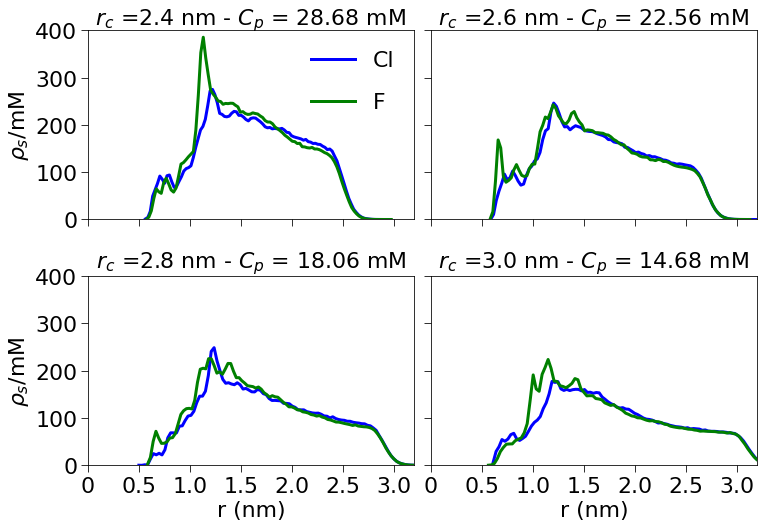

In [6]:
###################
markersize = 15
fontsize = 22
###################

Nav = 6.022e23          # 1/mol
to_mM = 1e24/Nav *1000  # convert 1/nm^3 --> mmol/l

r = [2.4, 2.6, 2.8, 3.0]
Ions = ['Cl', 'F']
pH = 2

colors = ['b','g']
simbols = ['o', 'o']

fig, axs = plt.subplots(2, 2, sharex=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.3)

for j,i in enumerate(r):
    if j<2:
        for col, name in enumerate(Ions):
            V = (4.0/3.0) * np.pi * (i*i*i)
            k = (1/V) * to_mM
            
            file = name+'/'+str(pH)+'/'+str(i)+'/0/density.rho'
            r_xtc, rho_xtc = np.loadtxt(file,unpack=True)
            
            axs[j*j-j,j].plot(r_xtc, rho_xtc,  label=name, c=colors[col], linewidth=3.0) 
            axs[j*j-j,j].set_title('$r_{c}$ ='+str(i)+' nm '+'- $C_p$ = '+'{:.2f}'.format(k)+' mM', fontsize=fontsize)
            if j==0:
                axs[j*j-j,j].legend(frameon=False, fontsize=fontsize)
            
            
    if j>1:
        for col, name in enumerate(Ions):
            V = (4.0/3.0) * np.pi * (i*i*i)
            k = (1/V) * to_mM
            file = name+'/'+str(pH)+'/'+str(i)+'/0/density.rho'
            
            r_xtc, rho_xtc = np.loadtxt(file,unpack=True)
            
            axs[int(j/j),j-2].plot(r_xtc, rho_xtc,  c=colors[col], linewidth=3.0) 
            axs[int(j/j),j-2].set_title('$r_{c}$ ='+str(i)+' nm '+'- $C_p$ = '+'{:.2f}'.format(k)+' mM', fontsize=fontsize)
            axs[int(j/j),j-2].legend(frameon=False, fontsize=fontsize)
   
    axs[0, 0].set_xlim(0,3.2)
    axs[0, 0].set_ylim(0,400)
    axs[0, 0].set(ylabel=r'$\rho_s$/mM')
    axs[0, 0].set_xticklabels([])
   
    axs[0, 1].set_xlim(0,3.2)
    axs[0, 1].set_ylim(0,400)
    axs[0, 1].set_yticklabels([])
    axs[0, 1].set_xticklabels([])
 
    axs[1, 0].set_xlim(0,3.2)
    axs[1, 0].set_ylim(0,400)
    axs[1, 0].set(xlabel='r (nm)', ylabel=r'$\rho_s$/mM')
    
    
    axs[1, 1].set_xlim(0,3.2)
    axs[1, 1].set_ylim(0,400)
    axs[1, 1].set(xlabel='r (nm)')
    axs[1, 1].set_yticklabels([])
    
plt.setp(axs[1, 0], xticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], xticklabels=['0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'] )     

axs[1, 0].tick_params(labelsize=fontsize)
axs[1, 1].tick_params(labelsize=fontsize)
axs[0, 0].tick_params(labelsize=fontsize)
axs[0, 1].tick_params(labelsize=fontsize)

fig.savefig('MD_density_profiles.png', dpi= 300, bbox_inches='tight')

# Radial distribution functions

In [7]:
#Save data

#####################################
Ions = {'Cl':{ 'pH': [2], 'r':[2.4]},
        'F': { 'pH': [2], 'r':[2.4]}}
#####################################

##aa = ['ALA', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', #'ARG',
##      'LYS', 'MET', 'PHE', 'PRO', 'SER',  'TRP', 'TYR', 'VAL' ]#'LEU','THR',
aa = ['ASP', 'HIS', 'LYS']

for i in aa:
    for name, prop in Ions.items():
        for pH in prop ['pH']:
            for r in prop ['r']:
                for g in range(1):
                    path = '/'+str(name)+'/'+str(pH)+'/'+str(r)+'/'+str(g)+'/'
                    
                    if os.path.isfile(str(name)+'-'+str(i)+".csv"):
                        print('rdf - '+str(name)+'-'+str(i)+' already saved!')

                    else:
                        
                        traj = md.load(workdir+path+'run.dcd', top=workdir+path+'../../Protein_'+str(name)+'.pdb') # load traj and top
                        selection = traj.top.select_pairs('name '+str(name), 'resname '+str(i)+' and sidechain') # select protein and aa
                        #print(selection)
                        R, rdf = md.compute_rdf(traj, selection, opt=True, r_range=(0, 1))
                        a = np.asarray( [R, rdf ] )
                        np.savetxt(str(name)+'-'+str(i)+".csv", a, delimiter=",")


rdf - Cl-ASP already saved!
rdf - F-ASP already saved!
rdf - Cl-HIS already saved!
rdf - F-HIS already saved!
rdf - Cl-LYS already saved!
rdf - F-LYS already saved!


In [8]:
# Load rdf

R_F_ASP, rdf_F_ASP = genfromtxt('F-ASP.csv', delimiter=',')
R_Cl_ASP, rdf_Cl_ASP = genfromtxt('Cl-ASP.csv', delimiter=',')

R_F_HIS, rdf_F_HIS = genfromtxt('F-HIS.csv', delimiter=',')
R_Cl_HIS, rdf_Cl_HIS = genfromtxt('Cl-HIS.csv', delimiter=',')

R_F_LYS, rdf_F_LYS = genfromtxt('F-LYS.csv', delimiter=',')
R_Cl_LYS, rdf_Cl_LYS = genfromtxt('Cl-LYS.csv', delimiter=',')

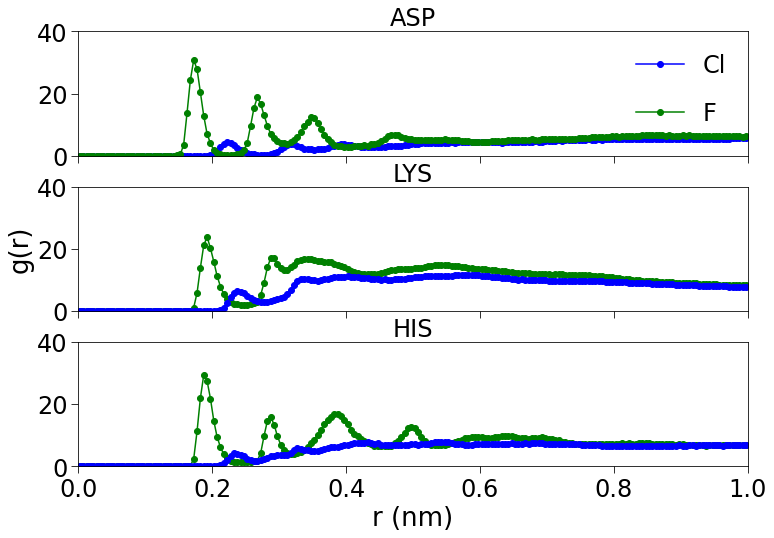

In [9]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  hspace=0.25)

markersize = 6
fontsize = 24
###################

axs[0].plot(R_Cl_ASP, rdf_Cl_ASP, 'bo-', label='Cl', markersize=markersize)
axs[0].plot(R_F_ASP, rdf_F_ASP, 'go-', label='F', markersize=markersize)
axs[0].legend(ncol=1, frameon=False, fontsize=fontsize)
axs[0].set_title('ASP', fontsize=fontsize)

axs[1].plot(R_F_LYS, rdf_F_LYS, 'go-', markersize=markersize)
axs[1].plot(R_Cl_LYS, rdf_Cl_LYS, 'bo-', markersize=markersize)
axs[1].set_title('LYS', fontsize=fontsize)

axs[2].plot(R_F_HIS, rdf_F_HIS, 'go-', markersize=markersize)
axs[2].plot(R_Cl_HIS, rdf_Cl_HIS, 'bo-', markersize=markersize)
axs[2].set_title('HIS', fontsize=fontsize)

axs[1].set_ylabel('g(r)', fontsize=26)
axs[2].set_xlabel('r (nm)', fontsize=26)

for i in range(3):
    axs[i].set_xlim(0,1)
    axs[i].set_ylim(0,40)
    axs[i].tick_params(labelsize=24)
fig.savefig('rdf_profiles.png', dpi= 300, bbox_inches='tight')